In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import itertools
from matplotlib.pyplot import figure

In [24]:
Q1  = '''FirstName LastName	Sarah Stratman	Kelly Arbuckle	Tamara Gass	Vincent Gregorio	Sarah Kroenke	Alexandra Bastian	Hilary Caldwell	Alex Muessigmann	Bethany Neuhart	Ted Stocking	Stephanie Barker	Jake Kment	Alex Kreft	Rachel Mulder	Natalie Palmgren	Mary Quandt
Sarah Stratman	4	1	1	1	1	1	1	1	1	3	1	1	1	1	1	1
Kelly Arbuckle	1	4	1	1	1	1	1	1	1	1	1	1	1	1	1	1
Tamara Gass	1	1		1	1	1	4	1	1	1	1	1	1	1	1	1
Vincent Gregorio	1	1	1	4	1	1	1	3	1	1	1	1	1	1	1	2
Sarah Kroenke	1	1	1	1	4	1	1	1	1	1	1	1	1	1	1	1
Alexandra Bastian	1	1	1	1	1	4	1	1	1	1	1	1	1	1	1	1
Hilary Caldwell	1	1	4	1	1	1		1	4	1	1	1	1	1	1	1
Alex Muessigmann	1	1	1	3	1	1	1	4	1	1	1	1	1	1	1	1
Bethany Neuhart	1	1	1	1	1	1	4	1	4	1	1	1	1	1	1	1
Ted Stocking	3	1	1	1	1	1	1	1	1	4	1	1	1	1	1	1
Stephanie Barker	1	1	1	1	1	1	1	1	1	1		1	1	1	1	1
Jake Kment	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1
Alex Kreft	1	1	1	1	1	1	1	1	1	1	1	1	4	1	1	1
Rachel Mulder	2	1	1	1	1	1	1	1	1	1	1	1	1	4	1	2
Natalie Palmgren	1	1	1	1	1	1	1	1	1	1	1	1	1	1	4	1
Mary Quandt	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	4'''

In [25]:
data = [y for y in [x.strip() for x in Q1.splitlines()] if y]

In [26]:
set= []
for x in data:
    x = x.strip()
    x = x.split("\t")
    set.append(x)
data = set

In [27]:
nodes = data[0]
nodes = nodes[1::]
for i in range(len(nodes)):
    
    print(str(i)+" "+ str(nodes[i]))

0 Sarah Stratman
1 Kelly Arbuckle
2 Tamara Gass
3 Vincent Gregorio
4 Sarah Kroenke
5 Alexandra Bastian
6 Hilary Caldwell
7 Alex Muessigmann
8 Bethany Neuhart
9 Ted Stocking
10 Stephanie Barker
11 Jake Kment
12 Alex Kreft
13 Rachel Mulder
14 Natalie Palmgren
15 Mary Quandt


In [35]:
mat = []
for x in data[1::]:
    mat.append(x[1::])
n = len(mat)

for x in range(len(mat)):
    for y in range(len(mat[x])):
        if (mat[x][y]==''):
            continue
        if (int(mat[x][y])!=1 or x==y):
            mat[x][y] = ''
        else:
            mat[x][y] = int(mat[x][y])

# for i in range(0, n):
#     for j in range(i+1, n):
#         mat[i][j],mat[j][i] = mat[j][i],mat[i][j]


for i in range(len(mat)):
    for j in range(len(mat[i])):
        if (i==j):
            mat[i][j] = ''

for i in range(len(mat)):
    print(mat[i])

['', 1, 1, 1, 1, 1, 1, 1, 1, '', 1, 1, 1, 1, 1, 1]
[1, '', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, '', 1, 1, 1, '', 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, '', 1, 1, 1, '', 1, 1, 1, 1, 1, 1, 1, '']
[1, 1, 1, 1, '', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, '', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, '', 1, 1, 1, '', 1, '', 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, '', 1, 1, 1, '', 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, '', 1, '', 1, 1, 1, 1, 1, 1, 1]
['', 1, 1, 1, 1, 1, 1, 1, 1, '', 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, '', 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, '', 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, '', 1, 1, 1]
['', 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, '', 1, '']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, '', 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, '']


In [36]:
A = np.matrix(mat)
G=nx.from_numpy_matrix(A, create_using=nx.DiGraph())

{0: 'Sarah Stratman', 1: 'Kelly Arbuckle', 2: 'Tamara Gass', 3: 'Vincent Gregorio', 4: 'Sarah Kroenke', 5: 'Alexandra Bastian', 6: 'Hilary Caldwell', 7: 'Alex Muessigmann', 8: 'Bethany Neuhart', 9: 'Ted Stocking', 10: 'Stephanie Barker', 11: 'Jake Kment', 12: 'Alex Kreft', 13: 'Rachel Mulder', 14: 'Natalie Palmgren', 15: 'Mary Quandt'}


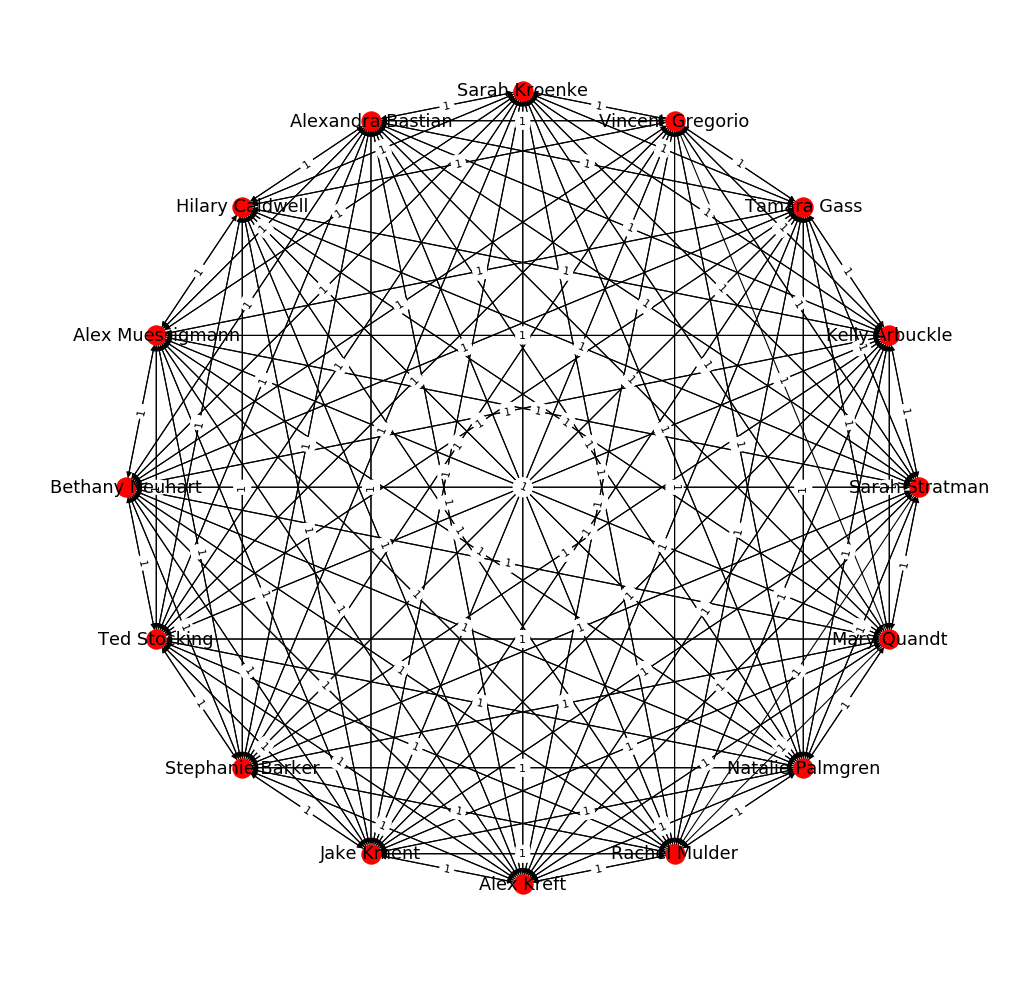

In [37]:
pos=nx.circular_layout(G) # positions for all nodes
figure(num=None, figsize=(12, 12), dpi=80)


nx.draw(G, pos)  # networkx draw()
x = 0
d = { i : nodes[i] for i in range(len(nodes)) }
print(d)

nx.draw_networkx_labels(G,pos,d,font_size=16)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.draw()  # pyplot draw()

In [39]:
G.edges()

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 0), (6, 1), (6, 3), (6, 4), (6, 5), (6, 7), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (7, 0), (7, 1), (7, 2), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (8, 0), (8, 1), (8, 2), (8, 3), (8, 

In [40]:
# Centrality
# Compute the degree centrality for nodes.
print(nx.degree_centrality(G))

{0: 1.8, 1: 2.0, 2: 1.8666666666666667, 3: 1.8, 4: 2.0, 5: 2.0, 6: 1.7333333333333334, 7: 1.8666666666666667, 8: 1.8666666666666667, 9: 1.8666666666666667, 10: 2.0, 11: 2.0, 12: 2.0, 13: 1.8666666666666667, 14: 2.0, 15: 1.8666666666666667}


In [41]:
# Centrality
# Compute the in-degree centrality for nodes.
print(nx.in_degree_centrality(G))

{0: 0.8666666666666667, 1: 1.0, 2: 0.9333333333333333, 3: 0.9333333333333333, 4: 1.0, 5: 1.0, 6: 0.8666666666666667, 7: 0.9333333333333333, 8: 0.9333333333333333, 9: 0.9333333333333333, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 0.8666666666666667}


In [42]:
for x in range(len(nodes)):
    print(str(x)+ " " +nodes[x])

0 Sarah Stratman
1 Kelly Arbuckle
2 Tamara Gass
3 Vincent Gregorio
4 Sarah Kroenke
5 Alexandra Bastian
6 Hilary Caldwell
7 Alex Muessigmann
8 Bethany Neuhart
9 Ted Stocking
10 Stephanie Barker
11 Jake Kment
12 Alex Kreft
13 Rachel Mulder
14 Natalie Palmgren
15 Mary Quandt


In [43]:
# Centrality
# Compute the out-degree centrality for nodes.
print(nx.out_degree_centrality(G))

{0: 0.9333333333333333, 1: 1.0, 2: 0.9333333333333333, 3: 0.8666666666666667, 4: 1.0, 5: 1.0, 6: 0.8666666666666667, 7: 0.9333333333333333, 8: 0.9333333333333333, 9: 0.9333333333333333, 10: 1.0, 11: 1.0, 12: 1.0, 13: 0.8666666666666667, 14: 1.0, 15: 1.0}


In [44]:
print(nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None))

{0: 0.002568463282748998, 1: 0.004068550497121926, 2: 0.0026033490319204607, 3: 0.002568463282748998, 4: 0.004068550497121926, 5: 0.004068550497121926, 6: 0.0026033490319204607, 7: 0.002965288679574394, 8: 0.0026033490319204607, 9: 0.0029652886795743945, 10: 0.004068550497121926, 11: 0.004068550497121926, 12: 0.004068550497121926, 13: 0.0025117739403453685, 14: 0.004068550497121926, 15: 0.0025117739403453694}


In [45]:
print(nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None))


{(0, 1): 0.004464285714285714, (0, 2): 0.004784798534798534, (0, 3): 0.0047619047619047615, (0, 4): 0.004464285714285714, (0, 5): 0.004464285714285714, (0, 6): 0.0051053113553113545, (0, 7): 0.004784798534798534, (0, 8): 0.004784798534798534, (0, 10): 0.004464285714285714, (0, 11): 0.004464285714285714, (0, 12): 0.004464285714285714, (0, 13): 0.004464285714285714, (0, 14): 0.004464285714285714, (0, 15): 0.004811507936507936, (1, 0): 0.004834401709401709, (1, 2): 0.004487179487179487, (1, 3): 0.004464285714285714, (1, 4): 0.004166666666666667, (1, 5): 0.004166666666666667, (1, 6): 0.004807692307692307, (1, 7): 0.004487179487179487, (1, 8): 0.004487179487179487, (1, 9): 0.004464285714285714, (1, 10): 0.004166666666666667, (1, 11): 0.004166666666666667, (1, 12): 0.004166666666666667, (1, 13): 0.004166666666666667, (1, 14): 0.004166666666666667, (1, 15): 0.00486111111111111, (2, 0): 0.005154914529914529, (2, 1): 0.004487179487179487, (2, 3): 0.004784798534798534, (2, 4): 0.0044871794871794

In [46]:
G.edges(data=True)

OutEdgeDataView([(0, 1, {'weight': '1'}), (0, 2, {'weight': '1'}), (0, 3, {'weight': '1'}), (0, 4, {'weight': '1'}), (0, 5, {'weight': '1'}), (0, 6, {'weight': '1'}), (0, 7, {'weight': '1'}), (0, 8, {'weight': '1'}), (0, 10, {'weight': '1'}), (0, 11, {'weight': '1'}), (0, 12, {'weight': '1'}), (0, 13, {'weight': '1'}), (0, 14, {'weight': '1'}), (0, 15, {'weight': '1'}), (1, 0, {'weight': '1'}), (1, 2, {'weight': '1'}), (1, 3, {'weight': '1'}), (1, 4, {'weight': '1'}), (1, 5, {'weight': '1'}), (1, 6, {'weight': '1'}), (1, 7, {'weight': '1'}), (1, 8, {'weight': '1'}), (1, 9, {'weight': '1'}), (1, 10, {'weight': '1'}), (1, 11, {'weight': '1'}), (1, 12, {'weight': '1'}), (1, 13, {'weight': '1'}), (1, 14, {'weight': '1'}), (1, 15, {'weight': '1'}), (2, 0, {'weight': '1'}), (2, 1, {'weight': '1'}), (2, 3, {'weight': '1'}), (2, 4, {'weight': '1'}), (2, 5, {'weight': '1'}), (2, 7, {'weight': '1'}), (2, 8, {'weight': '1'}), (2, 9, {'weight': '1'}), (2, 10, {'weight': '1'}), (2, 11, {'weight': '

In [47]:
# Question 2 in order
1	3	3	3	3	3	3	3	3	1	3	3	3	3	3	3
3	1	3	3	3	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	3	2	3	3	3	3	3	3	3	3	3
3	3	3	1	3	3	3	1	3	3	3	3	3	3	3	3
3	3	3	3	1,2	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	1	3	3	3	3	3	3	3	3	3	3
3	3	1	3	3	3		3	1	3	3	3	3	3	3	3
3	3	3	1	3	3	3	1	3	3	3	3	3	3	3	3
3	3	3	3	3	3	1	3	1,3	3	3	3	3	3	3	3
1,2	3	3	3	3	3	3	3	3	1,2	3	3	3	3	3	3
3	3	3	3	3	3	3	3	3	3		3	3	3	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	1	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3	1	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3		3


SyntaxError: invalid syntax (<ipython-input-47-38660177ed05>, line 2)

In [48]:
Q2 = '''Sarah Stratman	Kelly Arbuckle	Tamara Gass	Vincent Gregorio	Sarah Kroenke	Alexandra Bastian	Hilary Caldwell	Alex Muessigmann	Bethany Neuhart	Ted Stocking	Stephanie Barker	Jake Kment	Alex Kreft	Rachel Mulder	Natalie Palmgren	Mary Quandt
1	3	3	3	3	3	3	3	3	1	3	3	3	3	3	3
3	1	3	3	3	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	3		3	3	3	3	3	3	3	3	3
3	3	3	1	3	3	3	1	3	3	3	3	3	3	3	3
3	3	3	3	1	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	1	3	3	3	3	3	3	3	3	3	3
3	3	1	3	3	3		3	1	3	3	3	3	3	3	3
3	3	3	1	3	3	3	1	3	3	3	3	3	3	3	3
3	3	3	3	3	3	1	3	3	3	3	3	3	3	3	3
1	3	3	3	3	3	3	3	3	1	3	3	3	3	3	3
3	3	3	3	3	3	3	3	3	3		3	3	3	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	1	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3	1	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3		3'''

In [49]:
data2 = [y for y in [x for x in Q2.splitlines()] if y]
# for x in data:
#     print(x)
set2= []
for x in data2:
    x = x.strip()
    x = x.split("\t")
    set2.append(x)
data2 = set2
nodes = data2[0]
nodesR = nodes.copy()
nodesL = nodes.copy()

In [50]:
from networkx.algorithms import bipartite
B = nx.Graph()
for i in range(len(nodes)):
    nodesL[i] = nodes[i]+"L"
for i in range(len(nodes)):
    nodesR[i] = nodes[i]+"R"
B.add_nodes_from(nodesL, bipartite=0)
B.add_nodes_from(nodesR, bipartite=1)



In [51]:
for x in range(len(data2)):
    for y in range(len(data2[x])):
        if x == y+1:
            continue
        if data2[x][y] == '1':
            B.add_edges_from([(nodesL[x-1], nodesR[y])])

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


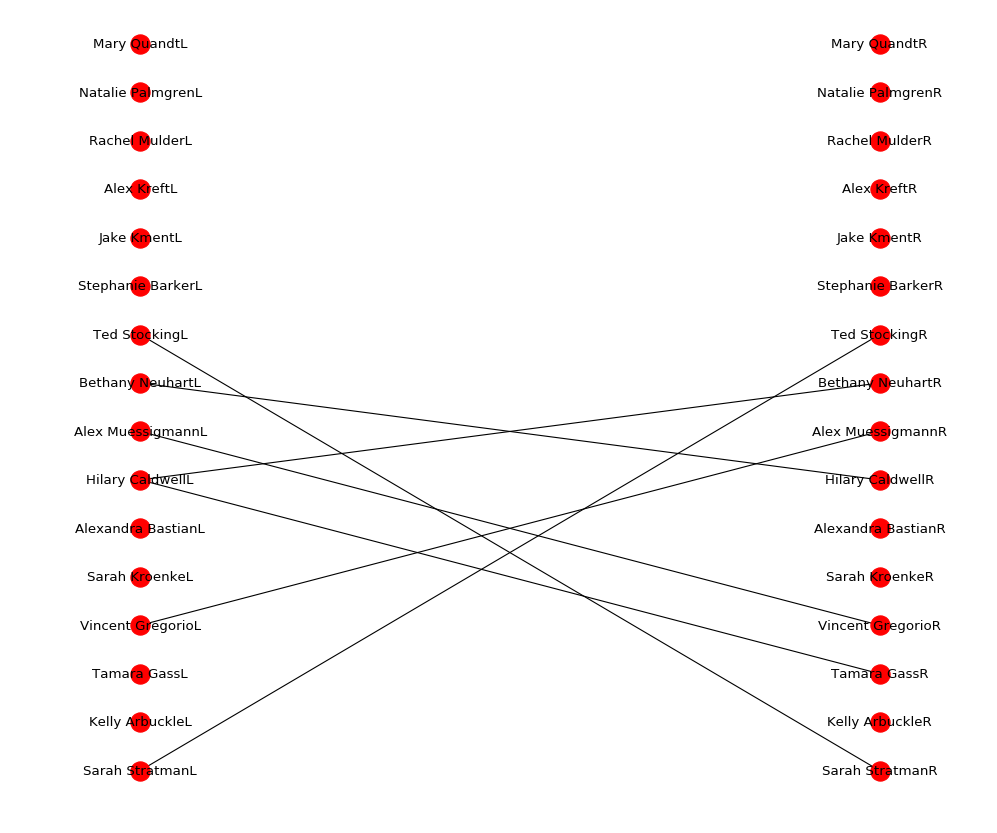

In [59]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pos = dict()
pos.update( (n, (1, i*2)) for i, n in enumerate(nodesL) ) # put nodes from X at x=1
pos.update( (n, (1.1, i*2)) for i, n in enumerate(nodesR) ) # put nodes from Y at x=2
edges = B.edges()

nx.draw(B, pos=pos, edges=edges, with_labels = True)
plt.show()

In [53]:
print(B.edges(data=True))

[('Sarah StratmanL', 'Ted StockingR', {}), ('Vincent GregorioL', 'Alex MuessigmannR', {}), ('Hilary CaldwellL', 'Tamara GassR', {}), ('Hilary CaldwellL', 'Bethany NeuhartR', {}), ('Alex MuessigmannL', 'Vincent GregorioR', {}), ('Bethany NeuhartL', 'Hilary CaldwellR', {}), ('Ted StockingL', 'Sarah StratmanR', {})]


In [73]:
print(nx.is_bipartite(B))
print(nx.is_connected(B))

True
False


In [74]:
#Return the degrees of the two node sets in the bipartite graph B.
bipartite.degrees(B, nodesR, weight=None)

(DegreeView({'Tamara GassL': 0, 'Sarah KroenkeL': 0, 'Vincent GregorioL': 1, 'Sarah StratmanL': 1, 'Alex KreftL': 0, 'Rachel MulderL': 0, 'Natalie PalmgrenL': 0, 'Ted StockingL': 1, 'Stephanie BarkerL': 0, 'Alexandra BastianL': 0, 'Hilary CaldwellL': 2, 'Mary QuandtL': 0, 'Bethany NeuhartL': 1, 'Alex MuessigmannL': 1, 'Kelly ArbuckleL': 0, 'Jake KmentL': 0}),
 DegreeView({'Stephanie BarkerR': 0, 'Ted StockingR': 1, 'Sarah StratmanR': 1, 'Kelly ArbuckleR': 0, 'Natalie PalmgrenR': 0, 'Mary QuandtR': 0, 'Alexandra BastianR': 0, 'Bethany NeuhartR': 1, 'Hilary CaldwellR': 1, 'Alex MuessigmannR': 1, 'Jake KmentR': 0, 'Alex KreftR': 0, 'Rachel MulderR': 0, 'Sarah KroenkeR': 0, 'Vincent GregorioR': 1, 'Tamara GassR': 1}))

In [76]:
#Compute the closeness centrality for nodes in a bipartite network.
#The closeness of a node is the distance to all other nodes in the graph 
# or in the case that the graph is not connected to all other nodes 
#in the connected component containing that node.
bipartite.closeness_centrality(B, nodesR, normalized=True)

{16.0: 0.0,
 'Ted StockingR': 1.4838709677419355,
 'Sarah StratmanR': 1.4838709677419355,
 'Bethany NeuhartR': 0.989247311827957,
 'Hilary CaldwellR': 1.4838709677419355,
 'Alex MuessigmannR': 1.4838709677419355,
 'Vincent GregorioR': 1.4838709677419355,
 'Tamara GassR': 0.989247311827957,
 'Vincent GregorioL': 1.4838709677419355,
 'Sarah StratmanL': 1.4838709677419355,
 'Ted StockingL': 1.4838709677419355,
 'Hilary CaldwellL': 1.4838709677419355,
 'Bethany NeuhartL': 1.4838709677419355,
 'Alex MuessigmannL': 1.4838709677419355}

In [77]:
#Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.
bipartite.betweenness_centrality(B, nodesR)

{'Sarah StratmanL': 0.0,
 'Kelly ArbuckleL': 0.0,
 'Tamara GassL': 0.0,
 'Vincent GregorioL': 0.0,
 'Sarah KroenkeL': 0.0,
 'Alexandra BastianL': 0.0,
 'Hilary CaldwellL': 0.0022222222222222222,
 'Alex MuessigmannL': 0.0,
 'Bethany NeuhartL': 0.0,
 'Ted StockingL': 0.0,
 'Stephanie BarkerL': 0.0,
 'Jake KmentL': 0.0,
 'Alex KreftL': 0.0,
 'Rachel MulderL': 0.0,
 'Natalie PalmgrenL': 0.0,
 'Mary QuandtL': 0.0,
 'Sarah StratmanR': 0.0,
 'Kelly ArbuckleR': 0.0,
 'Tamara GassR': 0.0,
 'Vincent GregorioR': 0.0,
 'Sarah KroenkeR': 0.0,
 'Alexandra BastianR': 0.0,
 'Hilary CaldwellR': 0.0,
 'Alex MuessigmannR': 0.0,
 'Bethany NeuhartR': 0.0,
 'Ted StockingR': 0.0,
 'Stephanie BarkerR': 0.0,
 'Jake KmentR': 0.0,
 'Alex KreftR': 0.0,
 'Rachel MulderR': 0.0,
 'Natalie PalmgrenR': 0.0,
 'Mary QuandtR': 0.0}

In [60]:
Q3 = '''Sarah Stratman	Kelly Arbuckle	Tamara Gass	Vincent Gregorio	Sarah Kroenke	Alexandra Bastian	Hilary Caldwell	Alex Muessigmann	Bethany Neuhart	Ted Stocking	Stephanie Barker	Jake Kment	Alex Kreft	Rachel Mulder	Natalie Palmgren	Mary Quandt
0	3	3	3	3	3	3	3	3		3	3	3	3	3	3
3		3	3	3	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	3	2	3	3	3	3	3	3	3	3	3
3	3	3		3	3	3		3	3	3	3	3	3	3	3
3	3	3	3	2	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3		3	3	3	3	3	3	3	3	3	3
3	3		3	3	3		3		3	3	3	3	3	3	3
3	3	3		3	3	3		3	3	3	3	3	3	3	3
3	3	3	3	3	3		3	3	3	3	3	3	3	3	3
2	3	3	3	3	3	3	3	3	2	3	3	3	3	3	3
3	3	3	3	3	3	3	3	3	3		3	3	3	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3	3	3
3	3	3	3	3	3	3	3	3	3	3	3	3		3	3
3	3	3	3	3	3	3	3	3	3	3	3	3	3		3
3	3	3	3	3	3	3	3	3	3	3	3	3	3		3'''

In [61]:
data3 = [y for y in [x for x in Q3.splitlines()] if y]
# for x in data:
#     print(x)
set3= []
for x in data3:
    x = x.strip()
    x = x.split("\t")
    set3.append(x)
data3 = set3
nodes = data3[0]
nodesR = nodes.copy()
nodesL = nodes.copy()

In [62]:
from networkx.algorithms import bipartite
B2 = nx.Graph()
for i in range(len(nodes)):
    nodesL[i] = nodes[i]+"L"
for i in range(len(nodes)):
    nodesR[i] = nodes[i]+"R"
B2.add_nodes_from(nodesL, bipartite=0)
B2.add_nodes_from(nodesR, bipartite=1)

In [63]:
for x in range(len(data3)):
    for y in range(len(data3[x])):
        if x == y+1:
            continue
        if data3[x][y] == '2':
            B2.add_edges_from([(nodesL[x-1], nodesR[y])])

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


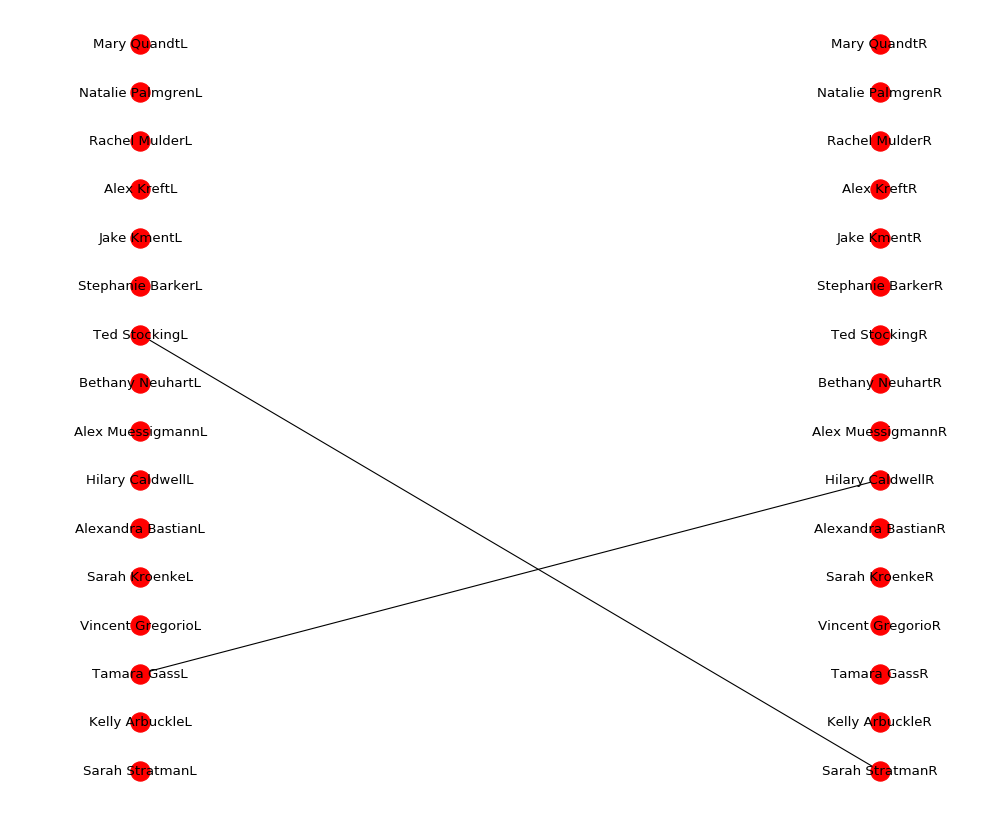

In [66]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

pos = dict()
pos.update( (n, (1, i*2)) for i, n in enumerate(nodesL) ) # put nodes from X at x=1
pos.update( (n, (1.1, i*2)) for i, n in enumerate(nodesR) ) # put nodes from Y at x=2

nx.draw(B2, pos=pos, edges=edges, with_labels = True)
plt.show()

In [65]:
#Return the degrees of the two node sets in the bipartite graph B.
bipartite.degrees(B2, nodesR, weight=None)

(DegreeView({'Alex MuessigmannL': 0, 'Alex KreftL': 0, 'Alexandra BastianL': 0, 'Stephanie BarkerL': 0, 'Mary QuandtL': 0, 'Sarah KroenkeL': 0, 'Sarah StratmanL': 0, 'Rachel MulderL': 0, 'Vincent GregorioL': 0, 'Bethany NeuhartL': 0, 'Natalie PalmgrenL': 0, 'Ted StockingL': 1, 'Kelly ArbuckleL': 0, 'Tamara GassL': 1, 'Jake KmentL': 0, 'Hilary CaldwellL': 0}),
 DegreeView({'Kelly ArbuckleR': 0, 'Sarah KroenkeR': 0, 'Alexandra BastianR': 0, 'Alex MuessigmannR': 0, 'Hilary CaldwellR': 1, 'Rachel MulderR': 0, 'Vincent GregorioR': 0, 'Jake KmentR': 0, 'Sarah StratmanR': 1, 'Ted StockingR': 0, 'Mary QuandtR': 0, 'Natalie PalmgrenR': 0, 'Stephanie BarkerR': 0, 'Tamara GassR': 0, 'Bethany NeuhartR': 0, 'Alex KreftR': 0}))

In [84]:
#Compute the closeness centrality for nodes in a bipartite network.
#The closeness of a node is the distance to all other nodes in the graph 
# or in the case that the graph is not connected to all other nodes 
#in the connected component containing that node.
bipartite.closeness_centrality(B2, nodesR, normalized=True)

{16.0: 0.0,
 'Sarah StratmanR': 1.4838709677419355,
 'Hilary CaldwellR': 1.4838709677419355,
 'Tamara GassL': 1.4838709677419355,
 'Ted StockingL': 1.4838709677419355}

In [85]:
#Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.
bipartite.betweenness_centrality(B2, nodesR)

{'Sarah StratmanL': 0.0,
 'Kelly ArbuckleL': 0.0,
 'Tamara GassL': 0.0,
 'Vincent GregorioL': 0.0,
 'Sarah KroenkeL': 0.0,
 'Alexandra BastianL': 0.0,
 'Hilary CaldwellL': 0.0,
 'Alex MuessigmannL': 0.0,
 'Bethany NeuhartL': 0.0,
 'Ted StockingL': 0.0,
 'Stephanie BarkerL': 0.0,
 'Jake KmentL': 0.0,
 'Alex KreftL': 0.0,
 'Rachel MulderL': 0.0,
 'Natalie PalmgrenL': 0.0,
 'Mary QuandtL': 0.0,
 'Sarah StratmanR': 0.0,
 'Kelly ArbuckleR': 0.0,
 'Tamara GassR': 0.0,
 'Vincent GregorioR': 0.0,
 'Sarah KroenkeR': 0.0,
 'Alexandra BastianR': 0.0,
 'Hilary CaldwellR': 0.0,
 'Alex MuessigmannR': 0.0,
 'Bethany NeuhartR': 0.0,
 'Ted StockingR': 0.0,
 'Stephanie BarkerR': 0.0,
 'Jake KmentR': 0.0,
 'Alex KreftR': 0.0,
 'Rachel MulderR': 0.0,
 'Natalie PalmgrenR': 0.0,
 'Mary QuandtR': 0.0}